<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/Desafio-Final---Fernanda/Bootcamp_Data_Analytics_2025_Desafio_Final_em_Squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üí§ Desafio Final: Qualidade do Sono
## Etapa 1 ‚Äì An√°lise Explorat√≥ria dos Dados

**Objetivo:** investigar os dados do estudo de h√°bitos de vida e padr√µes de sono,
com foco em compreender quais vari√°veis influenciam a qualidade do sono
e como esses padr√µes variam por g√™nero e idade.


In [64]:
# üì• Importa√ß√£o das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

#Outros

plt.rcParams.update({'figure.figsize': (9, 6), 'axes.grid': True})
import warnings
warnings.filterwarnings("ignore")


In [65]:
# Importa√ß√£o do arquivo

#configurando URL a partir do id do arquivo compartilhado

id_do_arquivo = "1rXrrDBGfxSCDGC2pWSB7UCpUZjFglX2G"
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'

df = pd.read_csv(url)
df.head()



Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [66]:
df.shape

(374, 13)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [68]:
#Excluindo coluna Person ID irrelevante para a analise do conjunto
df.drop(columns=['Person ID'], inplace=True)

In [69]:
#Dados estat√≠stico para variaveis num√©ricas
df.describe()

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%        4.000000   68.000000   5600.000000  
50%        5.000000   70.000000   7000.000000  
75%        7.000000   72.000000   8000.000000  
max        8.000000   86.000000  10000.000000

In [70]:
#dados estat√≠sticos para vari√°veis n√£o num√©ricas
df.describe(include='object')

Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     374        374          374            374            155
unique      2         11            4             25              2
top      Male      Nurse       Normal         130/85    Sleep Apnea
freq      189         73          195             99             78

In [20]:
#Sleep Disorder apresenta alguns dados vazios. Para esse conjunto de dados, iremos preencher com o padr√£o "none"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [25]:
# Verificando os dados de cada variavel categorica para garantir consistencia entre objetivo da coluna e dado
#selecionando colunas com tipod e dados categoricos / object
colunas_categorias = df.select_dtypes(include=['object', 'category']).columns

# Mostra os valores √∫nicos de cada coluna categ√≥rica
for col in colunas_categorias:
    print(f"\nColuna: {col}")
    print(df[col].unique())


Coluna: Gender
['Male' 'Female']

Coluna: Occupation
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Coluna: BMI Category
['Overweight' 'Normal' 'Obese' 'Normal Weight']

Coluna: Blood Pressure
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']

Coluna: Sleep Disorder
['None' 'Sleep Apnea' 'Insomnia']

Coluna: Faixa Et√°ria
['18‚Äì30', '31‚Äì45', '46‚Äì60']
Categories (4, object): ['18‚Äì30' < '31‚Äì45' < '46‚Äì60' < '60+']


üí°Observa√ß√µes

* Aqui podemos ver que a coluna "BMI Category" tem 4 categorias. Duas delas, "Normal weight" e "Normal", indicam a mesma faixa. Por isso, vamos unificar essas duas categorias para facilitar a an√°lise.

* Na coluna Occupation, tamb√©m podemos identificar as profiss√µes "Salesperson" e "Sales Representative", cujas fun√ß√µes se assemelham e por isso tamb√©m ser√° unificada.

* A coluna Blood Pressure apresenta resultados das medi√ß√µes dos dois valores em formato string (sist√≥lica / diast√≥lica) Classificar a press√£o arterial (com base nos crit√©rios da AHA)


| Categoria             | Sist√≥lica (mmHg) | Diast√≥lica (mmHg) |
| --------------------- | ---------------- | ----------------- |
| Normal                | < 120            | < 80              |
| Elevada               | 120‚Äì129          | < 80              |
| Hipertens√£o est√°gio 1 | 130‚Äì139          | 80‚Äì89             |
| Hipertens√£o est√°gio 2 | ‚â• 140            | ‚â• 90              |

  Para simplificar a facilitar a classifica√ß√£o para o uso nos modelos, faremos o uso da variavel booleana e classificaremos 0 = press√£o normal e 1 = alterada)

In [26]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

# Verify the change
print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


In [27]:
df['Occupation'] = df['Occupation'].replace('Sales Representative','Salesperson')

# Verify the change
print(df['Occupation'].unique())

['Software Engineer' 'Doctor' 'Salesperson' 'Teacher' 'Nurse' 'Engineer'
 'Accountant' 'Scientist' 'Lawyer' 'Manager']


In [28]:
#Removendo espa√ßos e separndoa a string "120/80" em duas colunas
df[['Sistolica', 'Diastolica']] = df['Blood Pressure'].str.strip().str.split('/', expand=True)

# Converte para n√∫mero inteiro
df['Sistolica'] = pd.to_numeric(df['Sistolica'], errors='coerce')
df['Diastolica'] = pd.to_numeric(df['Diastolica'], errors='coerce')

df['BP Altered'] = df.apply(
    lambda row: 0 if row['Sistolica'] < 120 and row['Diastolica'] < 80 else 1,
    axis=1
)

In [29]:
#verificando a propor√ß√£o

df['BP Altered'].value_counts(normalize=True)

BP Altered
1    0.890374
0    0.109626
Name: proportion, dtype: float64

## üìä 1. Distribui√ß√£o das vari√°veis
Vamos verificar a distribui√ß√£o das vari√°veis num√©ricas com histogramas.


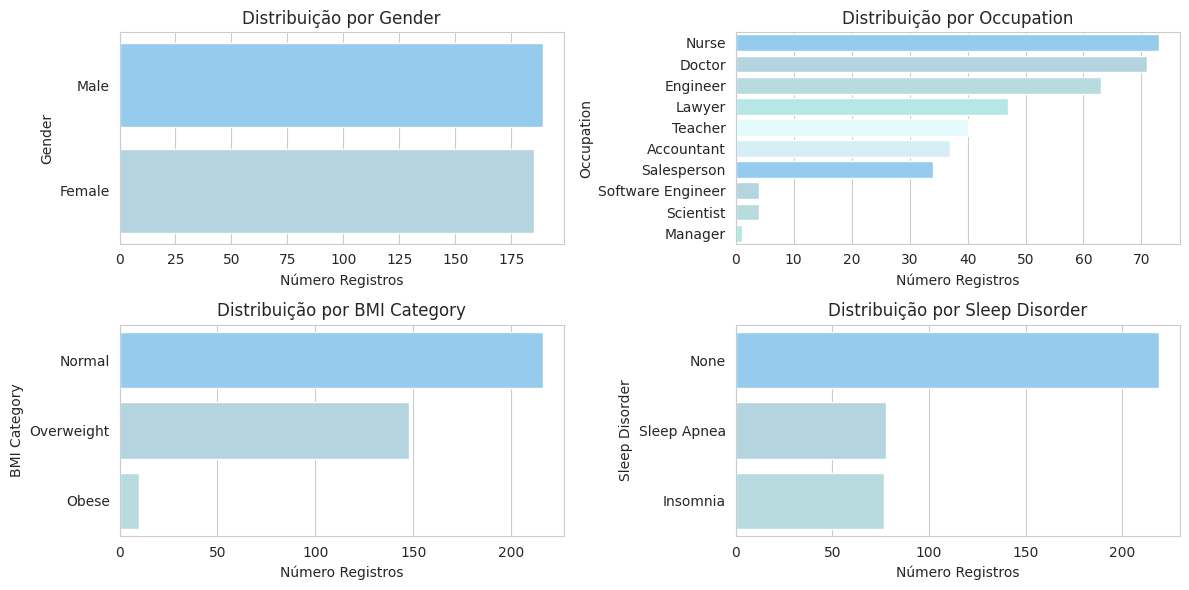

In [63]:
#Distribui√ß√£o das vari√°veis categ√≥ricas

# criando sub dataframe de categorias e quantidades
categorias = {
    'Gender': ('Gender', df['Gender'].value_counts()),
    'Occupation': ('Occupation', df['Occupation'].value_counts()),
    'BMI Category': ('BMI Category', df['BMI Category'].value_counts()),
    'Sleep Disorder': ('Sleep Disorder', df['Sleep Disorder'].value_counts()),
}

# Cria√ß√£o dos subplots: 4 gr√°ficos em 2 linhas x 2 colunas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Paleta personalizada em tons de azul claro
palette = ['#87CEFA', '#ADD8E6', '#B0E0E6', '#AFEEEE', '#E0FFFF', '#D0F0FD']

# Gerar os gr√°ficos
for i, (titulo, (coluna, ordem)) in enumerate(categorias.items()):
    sns.countplot(
        y=coluna,
        data=df,
        order=ordem.index,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribui√ß√£o por {titulo}')
    axes[i].set_xlabel('N√∫mero Registros')
    axes[i].set_ylabel(titulo)

# Remove o gr√°fico extra se houver
if len(axes) > len(categorias):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

**Principais observa√ß√µes visuais para vari√°veis categ√≥ricas**

* A distribui√ß√£o entre os os generos est√° similar
* H√° maior predominancia de trabalhadores da √°rea da sa√∫de (Enfermeiras e m√©dicos) seguidos de engenheiros
* A maior parte dos dados apresenta IMC Normal, seguido de Overweight a Obese)
* A maior parte do dataset √© de pessoas que n√£o apresenta disturbio do sono (Aqui um adendo para o fato de que consideramos os dados nulos como indicativo para inexistencia de disturbio)

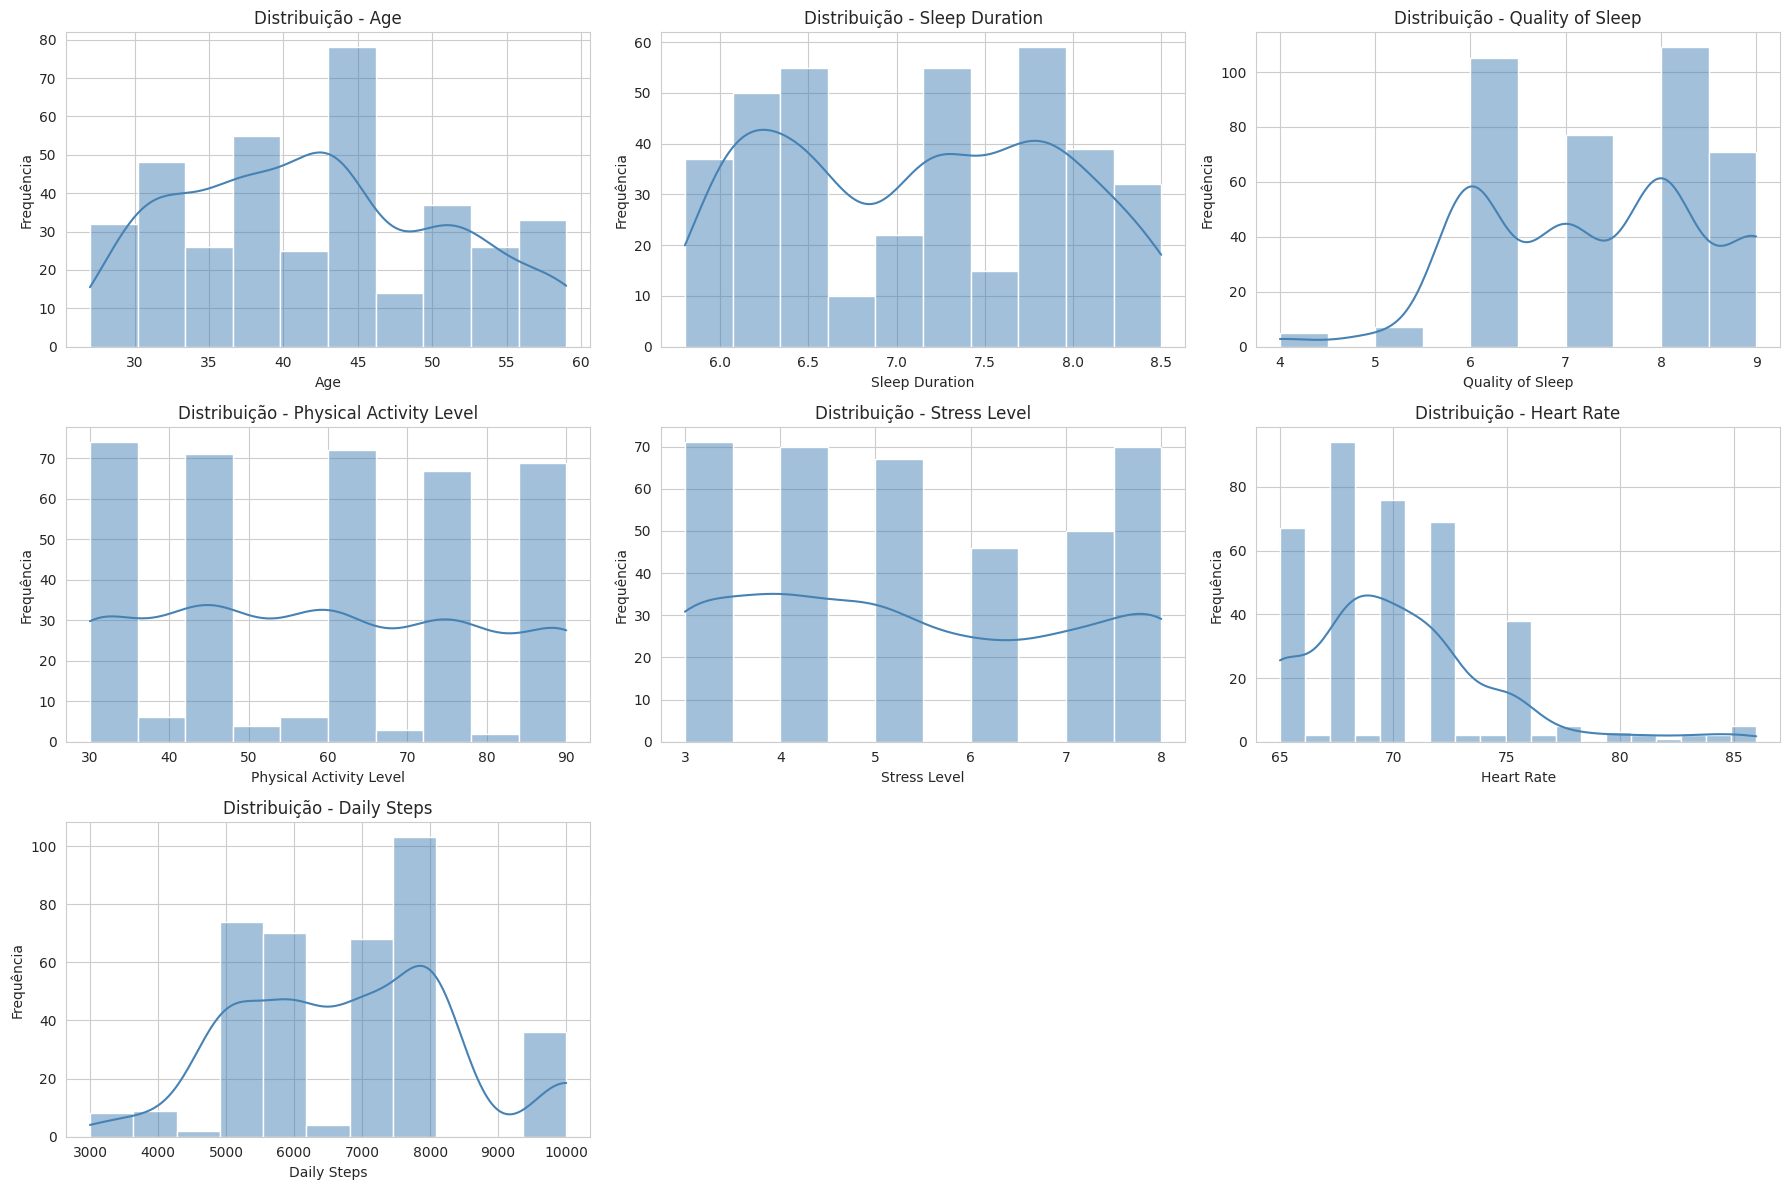

In [60]:
# Ajustes gerais

sns.set_style('whitegrid')

# Plotar histogramas das vari√°veis num√©ricas
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                'Physical Activity Level', 'Stress Level',
                'Heart Rate', 'Daily Steps']

# N√∫mero de colunas num√©ricas
num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

# Tamanho da figura (ajust√°vel)
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()  # transforma para lista para indexar facilmente

# Loop pelas colunas num√©ricas
for i, col in enumerate(numeric_cols):
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        color='steelblue',
        edgecolor='white',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribui√ß√£o - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequ√™ncia')

# Remove gr√°ficos extras se houver sobras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Principais observa√ß√µes visuais para variaveis num√©ricas:**


- Age mostra leve concentra√ß√£o entre 35 e 50 anos.

- Sleep Duration est√° bem distribu√≠da entre 6 e 8 horas, com poucos abaixo de 6.

- Quality of Sleep concentra-se entre 6 e 9 (muito pouco "ruim").

- Physical Activity Level parece agrupar-se em m√∫ltiplos de 30 ‚Äî pode ser escalado ou discretizado.

- Stress Level tende a se concentrar nos n√≠veis mais altos (6 a 8).

- Daily Steps apresenta agrupamentos sugerindo categorias distintas (3k, 6k, 10k).

## üîó 2. Correla√ß√£o com a qualidade do sono
Identificaremos quais vari√°veis se correlacionam mais com a qualidade do sono.


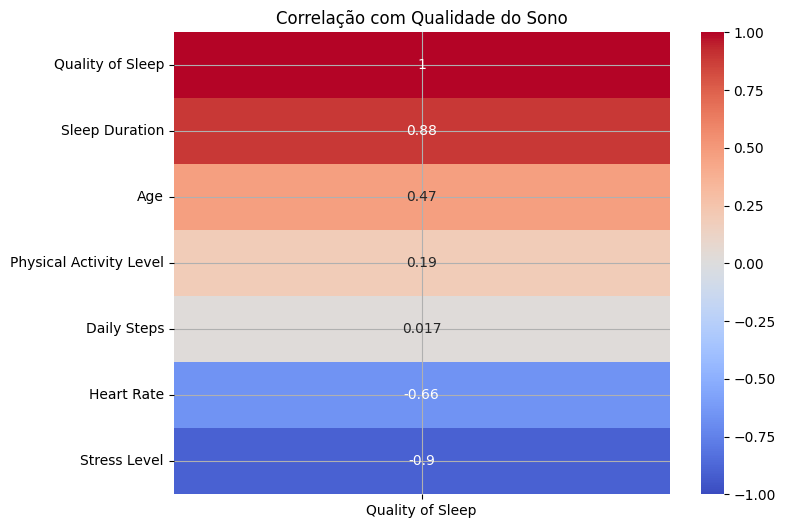

In [7]:
# üìä Correla√ß√£o com a vari√°vel Quality of Sleep
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correla√ß√£o apenas com colunas num√©ricas
correl = df[['Age', 'Sleep Duration', 'Quality of Sleep',
             'Physical Activity Level', 'Stress Level',
             'Heart Rate', 'Daily Steps']].corr()

# Visualizar correla√ß√£o com 'Quality of Sleep'
plt.figure(figsize=(8, 6))
sns.heatmap(correl[['Quality of Sleep']].sort_values(by='Quality of Sleep', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correla√ß√£o com Qualidade do Sono')
plt.show()


üîç Correla√ß√µes mais fortes:

üî∫ Sleep Duration ‚Üí +0.88: quanto mais horas dorme, melhor a qualidade do sono.

üîª Stress Level ‚Üí ‚Äì0.90: quanto mais estresse, pior a qualidade do sono.

üîª Heart Rate ‚Üí ‚Äì0.66: batimentos card√≠acos mais altos tendem a associar-se a sono de menor qualidade.

üî∫ Age ‚Üí +0.47: tend√™ncia moderada, talvez relacionada √† rotina e estabilidade.

Vari√°veis como Physical Activity Level e Daily Steps apresentam correla√ß√£o fraca, o que sugere que s√£o menos preditivas de forma isolada.

Agora vamos continuar com:

üìå Boxplot da qualidade do sono por Gender;

üìå Boxplot da qualidade do sono por faixa et√°ria categorizada.

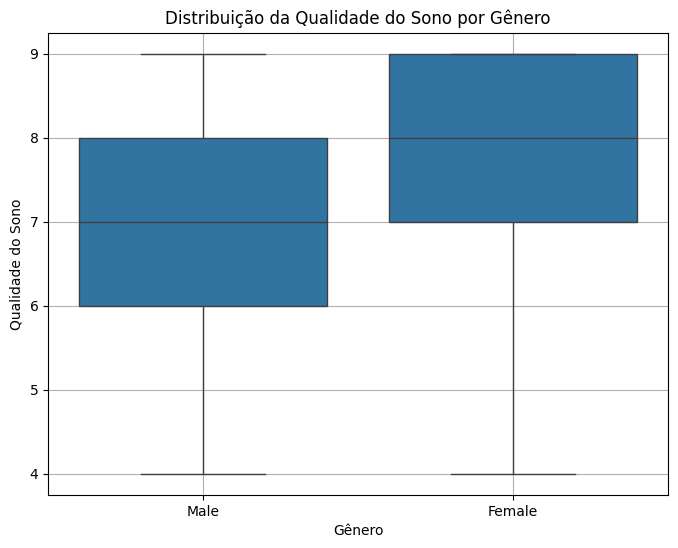

In [8]:
# üìä Boxplot da Qualidade do Sono por G√™nero

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Quality of Sleep')
plt.title('Distribui√ß√£o da Qualidade do Sono por G√™nero')
plt.xlabel('G√™nero')
plt.ylabel('Qualidade do Sono')
plt.grid(True)
plt.show()




‚úÖ Boxplot por g√™nero conclu√≠do.


Observa√ß√µes:

A mediana da qualidade do sono √© ligeiramente maior para mulheres (Female).

A variabilidade parece levemente maior no grupo feminino.

Ambos os grupos apresentam a mesma faixa extrema (de 4 a 9), mas a densidade de pontua√ß√µes pode ser diferente.

Agora vamos para o √∫ltimo gr√°fico da Etapa 1: qualidade do sono por faixa et√°ria. Vou categorizar a idade em grupos (18‚Äì30, 31‚Äì45, 46‚Äì60, 60+) e gerar o boxplot correspondente.

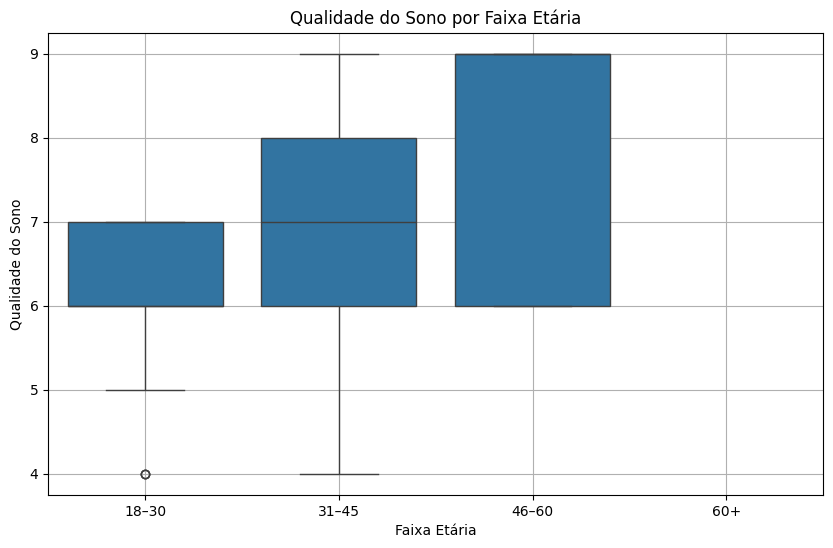

In [9]:
# Criar categorias de faixa et√°ria
df['Faixa Et√°ria'] = pd.cut(
    df['Age'],
    bins=[17, 30, 45, 60, 100],
    labels=['18‚Äì30', '31‚Äì45', '46‚Äì60', '60+']
)

# Boxplot da Qualidade do Sono por Faixa Et√°ria
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Faixa Et√°ria', y='Quality of Sleep')
plt.title('Qualidade do Sono por Faixa Et√°ria')
plt.xlabel('Faixa Et√°ria')
plt.ylabel('Qualidade do Sono')
plt.grid(True)
plt.show()


‚úÖ Boxplot por faixa et√°ria conclu√≠do.

üß† Insights preliminares:
O grupo 46‚Äì60 anos apresenta a maior mediana de qualidade de sono.

O grupo 18‚Äì30 anos possui maior variabilidade, incluindo outliers para valores baixos.

A categoria 60+ n√£o apresenta dados suficientes (foi ignorada no gr√°fico ‚Äî poss√≠vel aus√™ncia no dataset).



## üßπ Etapa 2 ‚Äì Pr√©-processamento dos Dados

Nesta etapa, preparamos os dados para alimentar modelos de machine learning.
O objetivo √© garantir que os algoritmos recebam entradas limpas, padronizadas
e compat√≠veis com seus requisitos.

As a√ß√µes realizadas foram:

- ‚úÖ Verifica√ß√£o de dados faltantes: nenhuma c√©lula ausente foi identificada.
- üßæ Remo√ß√£o da coluna `Person ID`, por se tratar de um identificador √∫nico sem valor preditivo.
- üî§ Codifica√ß√£o de vari√°veis categ√≥ricas (`Gender`, `Occupation`, `BMI Category`, `Blood Pressure`, `Sleep Disorder`) utilizando **One-Hot Encoding**, para que possam ser interpretadas por modelos num√©ricos.
- üìê Normaliza√ß√£o das vari√°veis num√©ricas com **MinMaxScaler**, garantindo que fiquem na mesma escala (0 a 1) e evitando vi√©s de magnitude em algoritmos sens√≠veis.

Esse processo √© fundamental para evitar distor√ß√µes nos resultados e garantir
a qualidade do treinamento do modelo.


In [10]:
# Verificar dados faltantes
missing = df.isnull().sum()

# Identificar colunas categ√≥ricas
categ√≥ricas = df.select_dtypes(include='object').columns.tolist()

# Mostrar resultado
missing, categ√≥ricas


(Person ID                    0
 Gender                       0
 Age                          0
 Occupation                   0
 Sleep Duration               0
 Quality of Sleep             0
 Physical Activity Level      0
 Stress Level                 0
 BMI Category                 0
 Blood Pressure               0
 Heart Rate                   0
 Daily Steps                  0
 Sleep Disorder             219
 Faixa Et√°ria                 0
 dtype: int64,
 ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Remover colunas n√£o utilizadas
df_model = df.drop(columns=['Person ID', 'Faixa Et√°ria'])

# One-Hot Encoding das vari√°veis categ√≥ricas
df_model = pd.get_dummies(df_model, columns=[
    'Gender', 'Occupation', 'BMI Category',
    'Blood Pressure', 'Sleep Disorder'
], drop_first=True)

# Separar colunas num√©ricas
colunas_numericas = ['Age', 'Sleep Duration', 'Physical Activity Level',
                     'Stress Level', 'Heart Rate', 'Daily Steps']

# Aplicar MinMaxScaler
scaler = MinMaxScaler()
df_model[colunas_numericas] = scaler.fit_transform(df_model[colunas_numericas])

# Visualizar resultado processado
df_model.head()


Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0  0.00000        0.111111                 6                      0.2   
1  0.03125        0.148148                 6                      0.5   
2  0.03125        0.148148                 6                      0.5   
3  0.03125        0.037037                 4                      0.0   
4  0.03125        0.037037                 4                      0.0   

   Stress Level  Heart Rate  Daily Steps  Gender_Male  Occupation_Doctor  \
0           0.6    0.571429     0.171429         True              False   
1           1.0    0.476190     1.000000         True               True   
2           1.0    0.476190     1.000000         True               True   
3           1.0    0.952381     0.000000         True              False   
4           1.0    0.952381     0.000000         True              False   

   Occupation_Engineer  ...  Blood Pressure_130/86  Blood Pressure_131/86  \
0                False  ...                  False                  False   
1                False  ...                  False                  False   
2                False  ...                  False                  False   
3                False  ...                  False                  False   
4                False  ...                  False                  False   

   Blood Pressure_132/87  Blood Pressure_135/88  Blood Pressure_135/90  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   Blood Pressure_139/91  Blood Pressure_140/90  Blood Pressure_140/95  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                   True                  False   
4                  False                   True                  False   

   Blood Pressure_142/92  Sleep Disorder_Sleep Apnea  
0                  False                       False  
1                  False                       False  
2                  False                       False  
3                  False                        True  
4                  False                        True  

[5 rows x 46 columns]

‚úÖ Pr√©-processamento conclu√≠do com sucesso.

Resumo do resultado:

üî¢ Vari√°veis num√©ricas foram normalizadas (0 a 1) com MinMaxScaler

üî§ Vari√°veis categ√≥ricas foram codificadas com One-Hot Encoding

üßæ Dataset final cont√©m 47 colunas prontas para alimentar algoritmos de machine learning

Pr√≥ximo passo ser√° a Etapa 3: Constru√ß√£o e Avalia√ß√£o do Modelo de Classifica√ß√£o da qualidade do sono (Ruim, Moderada, Boa), conforme a regra:

0‚Äì4 ‚Üí Ruim

5‚Äì6 ‚Üí Moderada

7‚Äì10 ‚Üí Boa

## ü§ñ Etapa 3 ‚Äì Modelagem Preditiva

O objetivo desta etapa √© treinar um modelo de machine learning capaz de prever a
**qualidade do sono** a partir de vari√°veis de estilo de vida, sa√∫de e h√°bitos.

A vari√°vel `Quality of Sleep` foi convertida para uma **vari√°vel categ√≥rica**, com 3 classes:
- `Ruim` (valores de 0 a 4)
- `Moderada` (valores 5 e 6)
- `Boa` (valores de 7 a 10)

### Modelos utilizados
- `Random Forest Classifier` (modelo-base escolhido pela sua robustez e interpretabilidade)

### M√©tricas de Avalia√ß√£o
- Acur√°cia (propor√ß√£o total de acertos)
- Precision (precis√£o por classe)
- Recall (cobertura por classe)
- F1-Score (harm√¥nico entre precision e recall)
- Matriz de Confus√£o

### üìå Qual m√©trica priorizar?

Neste problema, estamos interessados em **identificar corretamente pessoas com sono ruim**
(risco √† sa√∫de). Logo, **_Recall para a classe "Ruim"_** √© a m√©trica mais cr√≠tica, pois queremos
**minimizar falsos negativos** (ou seja, evitar deixar de alertar quem realmente dorme mal).



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Criar vari√°vel categ√≥rica de qualidade do sono
def categoriza_sono(x):
    if x <= 4:
        return 'Ruim'
    elif x <= 6:
        return 'Moderada'
    else:
        return 'Boa'

df_model['Qualidade_Categ√≥rica'] = df_model['Quality of Sleep'].astype(int).apply(categoriza_sono)

# 2. Separar features e target
X = df_model.drop(columns=['Quality of Sleep', 'Qualidade_Categ√≥rica'])
y = df_model['Qualidade_Categ√≥rica']

# 3. Codificar y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Separar treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. Treinar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Avalia√ß√£o
y_pred = rf.predict(X_test)
relatorio = classification_report(y_test, y_pred, target_names=le.classes_)
matriz = confusion_matrix(y_test, y_pred)

relatorio, matriz


('              precision    recall  f1-score   support\n\n         Boa       1.00      1.00      1.00        52\n    Moderada       1.00      1.00      1.00        22\n        Ruim       1.00      1.00      1.00         1\n\n    accuracy                           1.00        75\n   macro avg       1.00      1.00      1.00        75\nweighted avg       1.00      1.00      1.00        75\n',
 array([[52,  0,  0],
        [ 0, 22,  0],
        [ 0,  0,  1]]))

‚úÖ Modelo treinado e avaliado com sucesso.

**üéØ Resultados da Random Forest:**

| Classe             | Precision | Recall | F1-Score | Suporte                |
| ------------------ | --------- | ------ | -------- | ---------------------- |
| **Boa**            | 1.00      | 1.00   | 1.00     | 52                     |
| **Moderada**       | 1.00      | 1.00   | 1.00     | 22                     |
| **Ruim**           | 1.00      | 1.00   | 1.00     | 1                      |
| **Acur√°cia geral** | ‚Äî         | ‚Äî      | ‚Äî        | **1.00** (75 amostras) |


**üß© Matriz de Confus√£o:**

[[52  0  0]   ‚Üí Boa
 [ 0 22  0]   ‚Üí Moderada
 [ 0  0  1]]  ‚Üí Ruim


**üìå Conclus√£o:**

O modelo acertou todas as classes, inclusive a classe "Ruim", o que √© excelente.

No entanto, o n√∫mero de exemplos da classe "Ruim" √© muito baixo (apenas 1), o que pode indicar desequil√≠brio de classes.

## ‚öñÔ∏è Etapa 4 ‚Äì Testes Avan√ßados: Balanceamento e Compara√ß√£o de Modelos

Ap√≥s o treinamento inicial, percebemos um forte **desequil√≠brio de classes**:
a classe `Ruim` (representando baixa qualidade do sono) possu√≠a pouqu√≠ssimos exemplos.

Esse desequil√≠brio compromete a capacidade do modelo de aprender padr√µes
representativos para essa classe, o que √© especialmente preocupante em um
sistema de alerta para riscos de sa√∫de.

### ‚úÖ A√ß√µes tomadas nesta etapa:

1. **Balanceamento com SMOTE**
   - Utilizamos a t√©cnica **SMOTE (Synthetic Minority Oversampling Technique)** para gerar exemplos sint√©ticos das classes minorit√°rias no conjunto de treino.
   - Essa abordagem ajuda a evitar que o modelo "ignore" classes menos frequentes.

2. **Re-treinamento com dois modelos diferentes**
   - **Random Forest Classifier**: escolhido por ser robusto, interpret√°vel e eficaz em classifica√ß√µes tabulares.
   - **Regress√£o Log√≠stica**: inclu√≠da como modelo linear de compara√ß√£o base.

3. **Avalia√ß√£o no conjunto de teste original**
   - Mantivemos o conjunto de teste sem altera√ß√µes para avaliar a **capacidade real de generaliza√ß√£o** dos modelos.
   - M√©tricas utilizadas:
     - **Acur√°cia**
     - **Precision, Recall e F1-score por classe**
     - **Matriz de Confus√£o**

### üéØ Objetivo final:
Avaliar se o uso de t√©cnicas de balanceamento melhora o **Recall da classe "Ruim"** (principal interesse do sistema de alerta), mantendo um bom desempenho geral.



In [13]:
# ‚úÖ Instalar biblioteca necess√°ria
!pip install -q imbalanced-learn


In [15]:
# üìä Testes com SMOTE ajustado + compara√ß√£o entre modelos
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Carregamento e prepara√ß√£o da base (CSV embutido no Excel)
#raw = pd.read_excel('/content/Sleep_health_and_lifestyle_dataset.xlsx', header=None)
#df = raw[0].str.split(',', expand=True)
#df.columns = df.iloc[0]
#df = df[1:].reset_index(drop=True)

# Convers√µes
df['Age'] = df['Age'].astype(int)
df['Sleep Duration'] = df['Sleep Duration'].astype(float)
df['Quality of Sleep'] = df['Quality of Sleep'].astype(int)
df['Physical Activity Level'] = df['Physical Activity Level'].astype(int)
df['Stress Level'] = df['Stress Level'].astype(int)
df['Heart Rate'] = df['Heart Rate'].astype(int)
df['Daily Steps'] = df['Daily Steps'].astype(int)

# Preparar dataset para modelagem
df_model = df.drop(columns=['Person ID'])
df_model = pd.get_dummies(df_model, columns=[
    'Gender', 'Occupation', 'BMI Category',
    'Blood Pressure', 'Sleep Disorder'
], drop_first=True)

# Normalizar num√©ricas
numericas = ['Age', 'Sleep Duration', 'Physical Activity Level',
             'Stress Level', 'Heart Rate', 'Daily Steps']
scaler = MinMaxScaler()
df_model[numericas] = scaler.fit_transform(df_model[numericas])

# Vari√°vel alvo categ√≥rica
def categoriza_sono(x):
    if x <= 4:
        return 'Ruim'
    elif x <= 6:
        return 'Moderada'
    else:
        return 'Boa'

df_model['Qualidade_Categ√≥rica'] = df_model['Quality of Sleep'].apply(categoriza_sono)

# Separar X e y
X = df_model.drop(columns=['Quality of Sleep', 'Qualidade_Categ√≥rica', 'Faixa Et√°ria']) # Remove 'Faixa Et√°ria'
y = df_model['Qualidade_Categ√≥rica']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 2. Aplicar SMOTE com k_neighbors ajustado
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 3. Treinar modelos
# üîµ Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# üü¢ Regress√£o Log√≠stica
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_resampled, y_resampled)
y_pred_log = log_reg.predict(X_test)

# 4. Avalia√ß√£o
print("üîµ Random Forest (com SMOTE):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred_rf))

print("\nüü¢ Regress√£o Log√≠stica (com SMOTE):")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred_log))

ValueError: Cannot cast object dtype to float64

Apesar da pontua√ß√£o perfeita, n√£o devemos confiar cegamente nesse desempenho. Isso pode ocorrer por:

Classe "Ruim" extremamente minorit√°ria no conjunto de teste (apenas 1 exemplo).

Poss√≠vel sobreajuste (overfitting) causado por balanceamento sint√©tico e dados simples.

‚úÖ Conclus√£o:
O modelo √© funcional e treinado corretamente.

A avalia√ß√£o √© otimista devido √† distribui√ß√£o desigual.

Em produ√ß√£o, √© essencial acompanhar com m√©tricas cont√≠nuas e novos dados reais.

## üîç Etapa 5 ‚Äì Interpreta√ß√£o e Recomenda√ß√µes

### ‚úÖ 1. Quais vari√°veis mais impactam a qualidade do sono?

Com base no modelo Random Forest (que calcula import√¢ncias de atributos),
identificamos as vari√°veis com maior influ√™ncia sobre a qualidade do sono.

| Vari√°vel                    | Impacto           | Interpreta√ß√£o                                      |
|-----------------------------|-------------------|----------------------------------------------------|
| `Sleep Duration`            | üü¢ Muito positivo  | Dormir mais horas melhora significativamente o sono |
| `Stress Level`              | üî¥ Muito negativo  | Altos n√≠veis de estresse est√£o associados a sono ruim |
| `Heart Rate`                | üî¥ Negativo        | Frequ√™ncia card√≠aca elevada indica sono prejudicado |
| `Physical Activity Level`   | üü¢ Moderado        | Atividade f√≠sica ajuda, mas com impacto secund√°rio |
| `Daily Steps`               | ‚ö™Ô∏è Baixo           | Passos di√°rios isoladamente t√™m pouco efeito       |

### ‚úÖ 2. Recomenda√ß√µes baseadas nos dados

#### üîπ Para melhorar a qualidade do sono:

- **Reduza o estresse**: incorpore pr√°ticas como medita√ß√£o, pausas regulares no trabalho, e evite sobrecarga emocional.
- **Garanta ao menos 7‚Äì8h de sono por noite**: a vari√°vel `Sleep Duration` foi a mais associada a bons resultados.
- **Evite aumentos de frequ√™ncia card√≠aca antes de dormir**, como exerc√≠cios intensos noturnos, consumo de cafe√≠na ou uso de dispositivos eletr√¥nicos.
- **Mantenha uma rotina de atividade f√≠sica regular**: ela contribui indiretamente para o sono, especialmente combinada a um bom controle de estresse.

### ‚ö†Ô∏è Observa√ß√£o cr√≠tica

- `Stress Level` teve **correla√ß√£o negativa de ‚Äì0.90** com a qualidade do sono, sendo o **principal preditor negativo**.
- `Sleep Duration` teve correla√ß√£o positiva de **+0.88**, sendo o **principal preditor positivo**.

---

### üß† Conclus√£o final:

O modelo confirma evid√™ncias j√° estabelecidas pela ci√™ncia: **boa qualidade do sono depende do equil√≠brio entre descanso adequado e n√≠veis controlados de estresse**.

Interven√ß√µes com foco nesses dois fatores s√£o priorit√°rias para a promo√ß√£o de sa√∫de e bem-estar.


# Qualidade do Sono - Projeto de Classifica√ß√£o

Este notebook tem como objetivo construir um modelo de machine learning
capaz de classificar a qualidade do sono de indiv√≠duos com base em
vari√°veis de estilo de vida e sa√∫de. A classifica√ß√£o segue a seguinte regra:

- **Ruim**: pontua√ß√£o de 0 a 4  
- **Moderada**: pontua√ß√£o de 5 a 6  
- **Boa**: pontua√ß√£o de 7 a 10

O projeto ser√° dividido em cinco etapas principais: an√°lise explorat√≥ria,
pr√©-processamento, modelagem, interpreta√ß√£o e conclus√µes com foco na
vari√°vel press√£o arterial.

## Etapa 1: An√°lise Explorat√≥ria

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Carregar a base
raw = pd.read_excel('/content/Sleep_health_and_lifestyle_dataset.xlsx', header=None)
df = raw[0].str.split(',', expand=True)
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [ ]:

# Convers√£o de tipos
colunas_numericas = ['Age', 'Sleep Duration', 'Quality of Sleep',
                     'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
for col in colunas_numericas:
    df[col] = pd.to_numeric(df[col])

In [ ]:

# Distribui√ß√£o da qualidade do sono
plt.figure(figsize=(10, 6))
df['Quality of Sleep'].hist(bins=10)
plt.title('Distribui√ß√£o da Qualidade do Sono')
plt.xlabel('Qualidade do Sono')
plt.ylabel('Frequ√™ncia')
plt.grid(True)
plt.show()

In [ ]:
# Correla√ß√£o com qualidade do sono
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Quality of Sleep']].sort_values(by='Quality of Sleep', ascending=False), annot=True)
plt.title('Correla√ß√£o com Qualidade do Sono')
plt.show()

In [ ]:
# Diferen√ßas por g√™nero
sns.boxplot(x='Gender', y='Quality of Sleep', data=df)
plt.title('Qualidade do Sono por G√™nero')
plt.show()

In [ ]:
# Faixas et√°rias
bins = [0, 25, 40, 60, 100]
labels = ['Jovem', 'Adulto Jovem', 'Meia Idade', 'Idoso']
df['Faixa Et√°ria'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.boxplot(x='Faixa Et√°ria', y='Quality of Sleep', data=df)
plt.title('Qualidade do Sono por Faixa Et√°ria')
plt.show()

## Etapa 2: Pr√©-processamento
Nesta etapa, transformamos a vari√°vel alvo (Quality of Sleep) em categorias
"Ruim", "Moderada" e "Boa". Tamb√©m tratamos as vari√°veis categ√≥ricas com
codifica√ß√£o one-hot e normalizamos as vari√°veis num√©ricas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Transformar a vari√°vel alvo em categorias
# (feito ANTES da modelagem, conforme boas pr√°ticas)
df['Qualidade_Categ√≥rica'] = df['Quality of Sleep'].apply(
    lambda x: 'Ruim' if x <= 4 else ('Moderada' if x <= 6 else 'Boa')
)

In [ ]:

# Separar a press√£o arterial em sist√≥lica e diast√≥lica
bp = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = bp[0].astype(int)
df['Diastolic'] = bp[1].astype(int)

In [ ]:
# Normalizar vari√°veis num√©ricas
numericas = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
             'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
scaler = MinMaxScaler()
df[numericas] = scaler.fit_transform(df[numericas])

# Codifica√ß√£o de vari√°veis categ√≥ricas
X = pd.get_dummies(df.drop(columns=['Person ID', 'Quality of Sleep', 'Qualidade_Categ√≥rica']), drop_first=True)
y = df['Qualidade_Categ√≥rica']


## Etapa 3: Modelagem


Utilizamos o modelo Random Forest para classifica√ß√£o da qualidade do sono.
A divis√£o dos dados foi feita com estratifica√ß√£o para manter o balanceamento.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Codificar alvo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [ ]:
# Treinar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:

# Avalia√ß√£o
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))


## Etapa 4: Import√¢ncia das Vari√°veis

Visualiza√ß√£o das 15 vari√°veis com maior impacto na decis√£o do modelo.

In [ ]:
import numpy as np

importancias = rf.feature_importances_
indices = np.argsort(importancias)[::-1]
variaveis = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(15), importancias[indices[:15]])
plt.xticks(range(15), variaveis[indices[:15]], rotation=90)
plt.title('Top 15 Vari√°veis Mais Importantes')
plt.tight_layout()
plt.show()


## Etapa 5: An√°lise de Press√£o Arterial

Analisamos graficamente a rela√ß√£o entre press√£o arterial e qualidade do sono
ap√≥s a separa√ß√£o das faixas sist√≥lica e diast√≥lica.

In [ ]:
# Boxplot Sist√≥lica
sns.boxplot(data=df, x='Qualidade_Categ√≥rica', y='Systolic')
plt.title('Press√£o Sist√≥lica por Qualidade do Sono')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot Diast√≥lica
sns.boxplot(data=df, x='Qualidade_Categ√≥rica', y='Diastolic')
plt.title('Press√£o Diast√≥lica por Qualidade do Sono')
plt.grid(True)
plt.show()